# Exploring the Heart Attack Analysis & Prediction Dataset

Heart attacks can strike unexpectedly, impacting lives in ways we often don’t see coming. While they may happen to anyone, their occurrence is linked to various factors—some predictable, others not so much. 

Today, I’m diving into these important features to uncover their significance. I've gathered a dataset from a public source, which you can check out [here](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

My first step is to analyze this dataset using a <code>LogisticRegression</code> model. Through this machine learning journey, I aim to unearth valuable insights about heart health.

To kick things off, let me introduce you to the details of the dataset I have. For this, I’ll be importing my fabulous dataset from my computer to this notebook with the help of my trusty sidekick, Pandas!

# Prepare data

first of all we sholud have to import all of the respective liabraries for data handling, cleaning, model building and to communicate result.

First we import <code>pandas</code>, Pandas makes data analysis effortless by allowing you to clean, manipulate, and visualize data using its powerful DataFrame and Series structures.
Then import <code>matplotlib.pyplot</code>, Matplotlib.pyplot is commonly used for creating a wide range of static, animated, and interactive visualizations in Python, including line plots, bar charts, and scatter plots.

Import <code>sklearn</code>, Scikit-learn (sklearn) is widely used for implementing machine learning algorithms and performing tasks such as classification, regression, clustering, and model evaluation in Python.
From scikit-Learn importing <code>LogisticRegression</code> and from <code>category_encoder</code> importing the <code>OneHotEncoder</code>. <code>LogisticRegression</code> is crucial for binary classification problems by modeling the probability of a categorical outcome, while <code>OneHotEncoder</code> is essential for converting categorical variables into a numerical format that can be used by machine learning algorithms.

Here in classification model we are not using the mean absolute error for testing our model, instead we use <code>accuracy_score</code>. It is also importing from sk-learn.
Next liabrary is the Scikit-learn's <code>train_test_split</code> function, which is important for efficiently and reproducibly partitioning data into training and testing sets, facilitating robust model evaluation and reducing the risk of overfitting.


The <code>make_pipeline</code> function in scikit-learn is important for streamlining the process of chaining multiple data preprocessing steps and model training into a single, cohesive workflow, ensuring that all steps are applied consistently and sequentially.

## Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

Impoted all the necessary liabraries..

## Explore

After that we have introduced a wrangle fuction to read the csv file into a dataframe by using the filepath.

The <code>wrangle</code> function is often used in data preprocessing to clean, transform, and prepare raw data for analysis by handling missing values, encoding categorical variables, and scaling features.


In [6]:
def wrangle(filepath):
    #reading the csv file and assingn it to 'data'.
    data = pd.read_csv(filepath)
    
    #Converting the 'data' into a DataFrame called 'df' by using pandas.
    df = pd.DataFrame(data)

    #changing the names of some columns of the dataframe for readebility.
    df.rename(columns={"cp": "pain_type", "trtbps": "BP" , "fbs" : "blod_sugr" , "thalachh" : "max_hrt_rate", "output" : "target"}, inplace=True)

    #replace the column value with categorical feature.
    blood_sugar = {
        1 : ">120",
        0 : "<120"
    }
    df["blod_sugr"] = df["blod_sugr"].replace(blood_sugar)

    rest_ecg = {
        0 : "normal",
        1 : "ST-T wave",
        2 : "definite left ventricular hypertrophy"
    }
    df["restecg"] = df["restecg"].replace(rest_ecg)

    pain_type = {
        0 : "typical_angina",
        1 : "atypical_angina",
        2 : "non-anginal_pain",
        3 : "asymptomatic"
    }
    df["pain_type"] = df["pain_type"].replace(pain_type)

    sex = {
        1 : "male",
        0 : "female"
    }
    df["sex"] = df["sex"].replace(sex)

    #dropping the leaky columns.
    df.drop(columns=["oldpeak", "slp", "caa", "thall",], inplace = True)
    
    return df

assinged the filepath to the wrangle fuction, which will create the dataframe that we actually want

In [3]:
df = wrangle("/Users/user/Downloads/heart (1).csv")
df.head()

,age,sex,pain_type,BP,chol,blod_sugr,restecg,max_hrt_rate,exng,target
0,63,male,asymptomatic,145,233,>120,normal,150,0,1
1,37,male,non-anginal_pain,130,250,<120,ST-T wave,187,0,1
2,41,female,atypical_angina,130,204,<120,normal,172,0,1
3,56,male,atypical_angina,120,236,<120,ST-T wave,178,0,1
4,57,female,typical_angina,120,354,<120,ST-T wave,163,1,1


Now we have our beautiful dataframe with the dataset. Before moving further, we have to discuss about the columns in our dataset. it is very important thing to convey the meaning of all variables to the audience. Through that only they can understand the importance of them more deeply.
In our dataset, some of the columns headings are in short form. we don't understand the meaning of them by reading it. I am going to explain the meaning of them one-by-one and changing the headings a little bit for readebility.

1) age - It is the age of the person in the dataset.
2) sex - it is the sex of the person in our dataset (1 = female, 0 = male)
3) cp - it is the Chest Pain type. It consist with 4 types (Value 1: typical angina
                Value 2: atypical angina
                Value 3: non-anginal pain
                Value 4: asymptomatic)
4) trtbps - resting blood pressure (in mm Hg)
5) chol - cholestrol level
6) fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7) restecg - resting electrocardiographic results (Value 0: normal
                Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8) thalachh - maximum heart rate achieved
9) exng - exercise induced angina (1 = yes; 0 = no)
10)  output - 0= less chance of heart attack 1= more chance of heart attack.

Here is the details of the columns. And our dataframe do have some additional columns. But it had not explained properly. that columns are not important also. Therefore we have dropped those columns.
For readebility we have renamed some columns, that all are included in the wrangle function.

Another important thing is that, we have replaced the numbers of the columns by using it's own categorical terms. It can also understand by looking on the wrangle function.

In [14]:
#Checking for the categorical features with high and low cardinalitty.
df.select_dtypes("object").nunique()

sex          2
pain_type    4
blod_sugr    2
restecg      3
dtype: int64

We have checked all the features for understanding the high and low cardinality. By checking that we understand there is no longer any feature with high or low cardinality. The number of unique items in the columns are appropriate for performing the model.

In [15]:
#Checking for the Multicollinearity.
corr = df.select_dtypes("number").drop(columns = ["target"]).corr()
corr

,age,BP,chol,max_hrt_rate,exng
age,1.000000,0.279351,0.213678,-0.398522,0.096801
BP,0.279351,1.000000,0.123174,-0.046698,0.067616
chol,0.213678,0.123174,1.000000,-0.009940,0.067023
max_hrt_rate,-0.398522,-0.046698,-0.009940,1.000000,-0.378812
exng,0.096801,0.067616,0.067023,-0.378812,1.000000


Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, which can lead to unreliable estimates of coefficients and reduced interpretability of the model. to know that, we have checked the correlation in between the features.

A picture is telling thousand storiers, So we assingn the correlation into a heatmap. 
A heatmap is a data visualization technique that displays values in a matrix format using color gradients, where each cell's color represents the magnitude of the value, making it easy to identify patterns, correlations, and anomalies in the data.

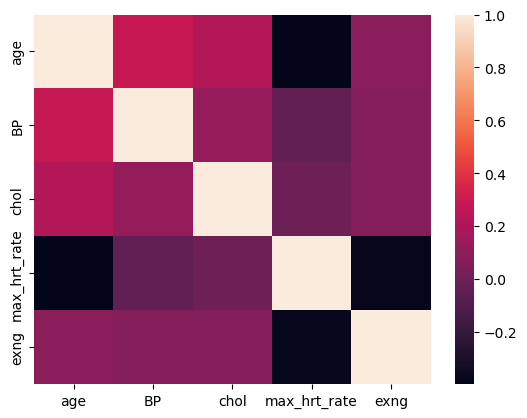

In [16]:
sns.heatmap(corr);

By looking on the heatmap above, it is clear that there is no longer a correlation between any of the features. So that is ok with this dataframe.

After that we are going to analyse the relationship in between some of features and our target. It is important to understand about the charecters and relationship of the features with our target

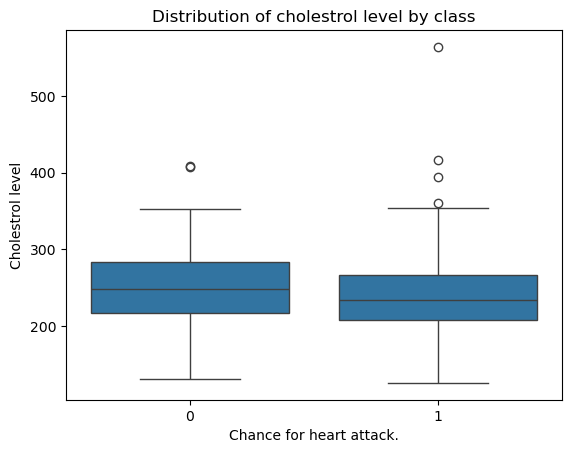

In [17]:
#checking one feature with the target.
sns.boxplot(
    x = "target",
    y = "chol",
    data = df
)
plt.xlabel("Chance for heart attack.")
plt.ylabel("Cholestrol level")
plt.title("Distribution of cholestrol level by class");

From here we can not get a proper conclusion about the relationship. Here we checking with the cholestrol level of individuals and the chance for heart attack.

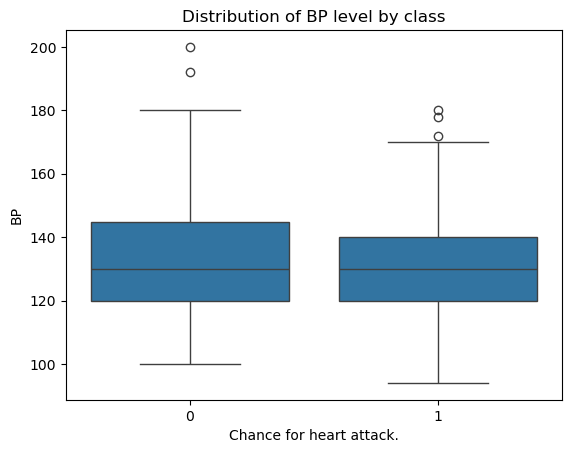

In [18]:
#checking one feature with the target.
sns.boxplot(
    x = "target",
    y = "BP",
    data = df
)
plt.xlabel("Chance for heart attack.")
plt.ylabel("BP")
plt.title("Distribution of BP level by class");

After that we are checking with the blood preasure of individuals and the chance for heart attack.

By going forward, now we are calculating the class balance of the model. Looking for 'Majority class' and 'Minority class'. In a dataset, the majority class represents the more frequently occurring category, while the minority class refers to the less frequent one, often posing challenges for classification tasks.

In [19]:
#Majority class and the minority class.
majority_class = df["target"].value_counts(normalize = True).max()
minority_class = df["target"].value_counts(normalize = True).min()
print(f"majority class is {majority_class}.")
print(f"minority class is {minority_class}.")

majority class is 0.5445544554455446.
minority class is 0.45544554455445546.


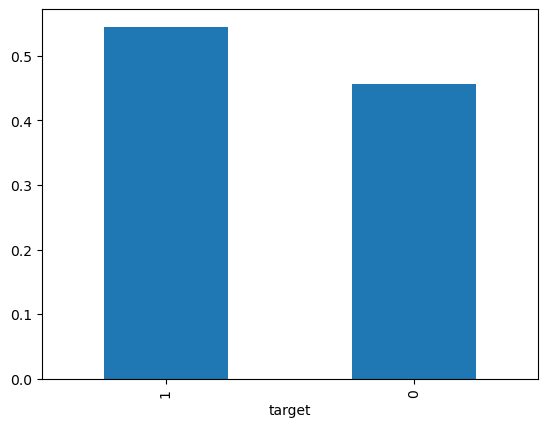

In [20]:
maj_mino = df["target"].value_counts(normalize=True).plot(kind = "bar")

After looking on the majority and minority class we are going to the 'Pivot table' for more data exploration. A pivot table is a data processing tool used in spreadsheet applications to summarize, analyze, and organize large datasets. It allows users to rearrange and aggregate data dynamically, making it easier to identify patterns, trends, and insights by grouping and calculating totals across different dimensions.

Before we proceed, it’s important to discuss a key concept: data balancing through <code>oversampling</code> and <code>undersampling</code>.
**Oversampling** is a technique used to balance class distribution by increasing the number of instances in the minority class. This can be done by duplicating existing examples or generating synthetic data using methods like SMOTE. By providing more examples, we help the model better understand the minority class.

**Undersampling**, on the other hand, reduces the number of instances in the majority class to achieve balance. This can involve randomly removing examples or using informed methods to retain the most informative ones. While it helps in balancing the dataset, care must be taken not to lose valuable information.

Both techniques aim to enhance the model's performance by ensuring a more equitable representation of each class.
But in here we are not going to the class balancing stage. we are going to the pivot table.

In [35]:
#pivot table.
ecg_pivot = pd.pivot_table(
    df, index = "pain_type", values = "target", aggfunc = np.mean
)
ecg_pivot.sort_values(by = "target")

C:\Users\user\AppData\Local\Temp\ipykernel_16348\1922608771.py:2: FutureWarning: The provided callable <function mean at 0x000001FD13888B80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ecg_pivot = pd.pivot_table(


,target
pain_type,
typical_angina,0.272727
asymptomatic,0.695652
non-anginal_pain,0.793103
atypical_angina,0.820000


- **Typical Angina (0.272727)**: This type of pain is associated with a lower probability of heart attack compared to the other types. A target value of approximately 0.27 suggests that individuals experiencing typical angina have a relatively lower risk.

- **Asymptomatic (0.695652)**: Individuals who are asymptomatic have a moderate risk of heart attack, with a target value of about 0.70. This indicates that even without symptoms, there may still be significant underlying risks.

- **Non-Anginal Pain (0.793103)**: This type of pain shows a higher probability of heart attack (around 0.79), suggesting that those experiencing non-anginal pain may be at considerable risk.

- **Atypical Angina (0.820000)**: Atypical angina has the highest target value at approximately 0.82, indicating a strong association with heart attack risk. This suggests that individuals reporting atypical angina should be closely monitored for heart health.

In summary, the pivot table highlights that as the type of pain becomes less typical, the associated risk of heart attack increases, emphasizing the importance of understanding pain types in heart disease assessments.

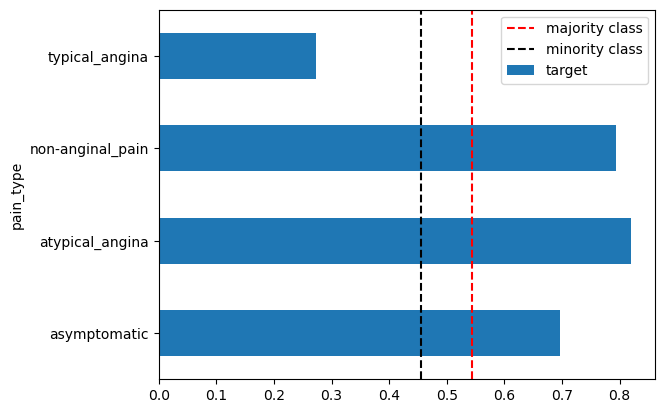

In [36]:
#pivot table with the bar chart.
ecg_pivot.plot(kind = "barh")
plt.axvline(majority_class, linestyle = "--", color = "red", label = "majority class")
plt.axvline(minority_class, linestyle = "--", color = "black", label = "minority class")
plt.legend()
plt.show()

By looking in this figure, we can see two lines representing the majority class and minority class. 

## Split

In [23]:
#feature matrix and the target vector.
feature = ["age", "sex", "pain_type", "BP", "chol", "max_hrt_rate", "exng"]
X = df[feature]
target = "target"
y = df[target]

Here comes our vertical split of our data. A vertical split in data organization helps to separate features from the target variable, allowing for clearer analysis and more effective model training in machine learning tasks.

In [24]:
#train and test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

And after that we are making the horizontal train test split. The train-test split is essential in machine learning as it divides the dataset into training and testing subsets, enabling the model to learn from one set while being evaluated on another to ensure its generalization to unseen data. We are making a randomized train test split here, because we are dealing with a classifiacation problem.

# Build model

## Baseline

Here we are first checking the baseline accuracy score for our model. Baseline accuracy score is the minimum expected accuracy of a model, typically determined by predicting the most frequent class in the dataset, serving as a benchmark to evaluate the performance of more complex models.

In [25]:
#baseline accuracy score.
acc_baseline = df["target"].value_counts(normalize = True).max()
print(f"baseline accuracy score is {acc_baseline}.")

baseline accuracy score is 0.5445544554455446.


## Iterate

In [37]:
#definning the model.
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter = 10000)
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'pain_type'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

We have trained our model by using our training data. It has been fitted perfectly...

It is the time to check our accuracy score for our model predictions. The accuracy score for training data measures the proportion of correctly predicted instances out of the total instances in the training set, providing insight into how well the model has learned from the training data. 
Insights from the accuracy score can reveal a model's effectiveness, indicate potential overfitting, highlight issues with class balance, serve as a benchmark for comparing different models, and guide iterative improvements in performance. A high accuracy score indicates that the model is correctly predicting a large proportion of the instances, suggesting it has learned the underlying patterns well.

## Evaluate

In [27]:
#train accuracy score.
acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"accuracy score for the training set is {acc_train}.")

accuracy score for the training set is 0.7892561983471075.


Here the training accuracy score is good. it beats the baseline. And next we have to check out the test accuracy of our model or the model's accuracy with our test data. Through that only we can confirm the generalizability of our model. The test accuracy score measures the proportion of correctly predicted instances out of the total instances in the test dataset, providing an indication of how well the model generalizes to unseen data.

In [28]:
#test accuracy score.
acc_test = accuracy_score(y_test, model.predict(X_test))
print(f"accuracy score for the test set is {acc_test}.")

accuracy score for the test set is 0.8360655737704918.


The test accuracy of our model is much better than our training accuracy. So it is good to go forward.

# Communicate

In [60]:
#probability for the predictions of the y_train.
y_train_pred_proba = model.predict_proba(X_train)[:5]
y_train_pred_proba= pd.DataFrame(y_train_pred_proba, columns=["pro_for_negative_class", "pro_for_positive_class"])
prediction = model.predict(X_train)[:5]
y_train_pred_proba["prediction"] = prediction
print(y_train_pred_proba)

   pro_for_negative_class  pro_for_positive_class  prediction
0                0.252081                0.747919           1
1                0.970657                0.029343           0
2                0.361864                0.638136           1
3                0.072875                0.927125           1
4                0.800238                0.199762           0


Here in the dataframe above, the first column 'pro_for_negative_class' represents the probability of being that prediction a negative class. And the se=cond column 'pro_for_positive_class' represents the probability of being that prediction a positive class. In which column the value will be more than 0.5, then the prediction will be that class.

In [61]:
#probability for the predictions of the y_test.
y_test_pred_proba = model.predict_proba(X_test)[:5]
y_test_pred_proba= pd.DataFrame(y_test_pred_proba, columns=["pro_for_negative_class", "pro_for_positive_class"])
prediction = model.predict(X_test)[:5]
y_test_pred_proba["prediction"] = prediction
print(y_test_pred_proba)

   pro_for_negative_class  pro_for_positive_class  prediction
0                0.969963                0.030037           0
1                0.541521                0.458479           0
2                0.172899                0.827101           1
3                0.711677                0.288323           0
4                0.143169                0.856831           1


Here we can see the probability of predictions for the test set.
Next we are going to focus on the feature importances.Feature importance in a logistic regression model refers to the significance of each predictor variable in influencing the outcome of the model. Unlike tree-based models that provide straightforward metrics for feature importance, logistic regression relies on the coefficients assigned to each feature. These coefficients indicate the direction and strength of the relationship between each feature and the target variable. A higher absolute value of a coefficient suggests a greater impact on the likelihood of the outcome. By exponentiating the coefficients, we can also interpret them as odds ratios, which help in understanding how changes in the feature values affect the odds of the outcome.  Overall, assessing feature importance in logistic regression is crucial for model interpretability and for making informed decisions based on the model's predictions.

In [31]:
#feature importance.
features = model.named_steps["onehotencoder"].get_feature_names_out()
features
importance = model.named_steps["logisticregression"].coef_[0]


An odds ratio is a statistic that measures the strength of association between a predictor variable and an outcome, indicating how the odds of the outcome change with a one-unit increase in the predictor; an OR greater than 1 suggests a positive relationship, while an OR less than 1 indicates a negative relationship.

In [63]:
#odds ratio.
odds_ratio = pd.Series(np.exp(importance), index = features).sort_values()
odds_ratio

pain_type_typical_angina      0.334436
exng                          0.382867
sex_male                      0.402119
age                           0.975982
BP                            0.983652
chol                          0.995142
max_hrt_rate                  1.029425
pain_type_atypical_angina     1.336902
pain_type_asymptomatic        1.386408
pain_type_non-anginal_pain    1.624451
sex_female                    2.504122
dtype: float64

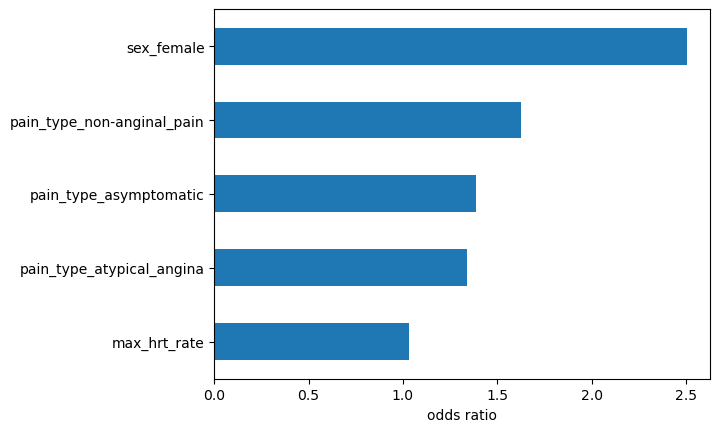

In [64]:
odds_ratio.tail(5).plot(kind = "barh",xlabel = "odds ratio");

Upon examining the diagram of feature importance represented by odds ratios, we can observe that the 'Female' category shows a significantly higher likelihood of heart attacks. This feature stands out as having the highest probability of occurrence, indicating that being female is a key factor associated with an increased risk of heart attack.

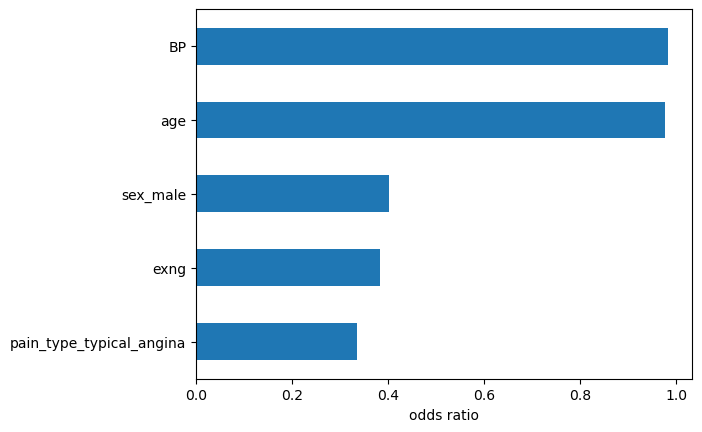

In [65]:
odds_ratio.head(5).plot(kind = "barh", xlabel = "odds ratio");

At the same time,when we consider the second diagrame with the features of least Odds ratio the pain type of typical angina have less probability to occur heart attack.

In [68]:
#Features of top five Odds ratio.
top_5_odd = odds_ratio.tail(5)
top_5_odd

max_hrt_rate                  1.029425
pain_type_atypical_angina     1.336902
pain_type_asymptomatic        1.386408
pain_type_non-anginal_pain    1.624451
sex_female                    2.504122
dtype: float64

1. **Max Heart Rate (1.029425)**: This feature has an odds ratio of approximately 1.03, suggesting that for each additional unit increase in maximum heart rate, the odds of having a heart attack increase by about 2.9%. While the effect is modest, it indicates a positive relationship between heart rate and heart attack risk.

2. **Pain Type: Atypical Angina (1.336902)**: With an odds ratio of about 1.34, individuals experiencing atypical angina are approximately 33.7% more likely to have a heart attack compared to those without this type of pain.

3. **Pain Type: Asymptomatic (1.386408)**: This odds ratio of around 1.39 indicates that asymptomatic individuals have a 38.6% higher chance of experiencing a heart attack. This underscores the importance of monitoring even those who do not exhibit obvious symptoms.

4. **Pain Type: Non-Anginal Pain (1.624451)**: The odds ratio of approximately 1.62 suggests that individuals reporting non-anginal pain are about 62.4% more likely to have a heart attack. This highlights a significant association between this pain type and heart attack risk.

5. **Sex: Female (2.504122)**: With the highest odds ratio of about 2.50, being female is associated with more than double the odds (150.4%) of having a heart attack compared to males. This finding emphasizes the critical need to consider gender differences in heart disease assessments.

In [69]:
#Features of least five Odds ratio.
least_5_odd = odds_ratio.head(5)
least_5_odd

pain_type_typical_angina    0.334436
exng                        0.382867
sex_male                    0.402119
age                         0.975982
BP                          0.983652
dtype: float64

1. **Pain Type: Typical Angina (0.334436)**: With an odds ratio of approximately 0.33, those experiencing typical angina are about 66.6% less likely to have a heart attack compared to those without this type of pain. It seems that typical angina is not the villain in this story after all!

2. **Exercise Induced Angina (Exng) (0.382867)**: An odds ratio of around 0.38 indicates that individuals with exercise-induced angina have a 61.7% lower chance of experiencing a heart attack. Who knew that a little workout pain could mean less heart risk?

3. **Sex: Male (0.402119)**: Males show an odds ratio of about 0.40, suggesting they are 59.8% less likely to have a heart attack compared to females in this dataset. This challenges some common assumptions about gender and heart disease—talk about a plot twist!

4. **Age (0.975982)**: With an odds ratio of approximately 0.98, each additional year of age is associated with a 2.4% decrease in heart attack risk. It seems that age is not just a number; in this case, it might be a number with a bit of a friendly discount!

5. **Blood Pressure (BP) (0.983652)**: The odds ratio of around 0.98 suggests that as blood pressure increases, the likelihood of a heart attack decreases by about 1.7%. While this might sound counterintuitive, it highlights the need for a nuanced understanding of how various factors interplay.

# Conclusion

### In this analysis, we navigated through a simulated dataset specifically chosen for educational purposes. While the odds ratios provided interesting insights into potential heart attack risk factors, the discrepancies—especially regarding blood pressure and age—serve as a reminder of the importance of critical thinking in data science.

### This project highlights that while datasets can be invaluable learning tools, it’s essential to approach them with a healthy dose of skepticism. Always remember to question your data, verify its authenticity, and consider the broader context of the findings.

### So, as we continue our journey in data science, let’s keep our minds open and our common sense sharp. After all, the true power of data lies not just in the numbers but in our ability to interpret them wisely! 